# Single Point Energy using `pyxtp`

## What this tutorial is about 

In this tutrial we will learn how to setup a simple single point calculation using the pyton interface to `XTP`, i.e. `pyxtp` and the Atomistic Simulation Environment (ASE). Let's first import the relevant modules:

In [1]:
from pyxtp import xtp, Visualization
from ase import Atoms

##  Define the molecular structure 

The python interface is built to leverage the ASE molecular structure classes `Atoms` and `Molecule`. Therefore we cam simply define the atomistic structure we want to use via the ASE native functionalities. Let's for example define a `CO` molecule using the `Atoms` ASE class 

In [2]:
atoms = Atoms('CO', positions=([0,0,0],[1.4,0,0]))

## Instantiate the `xtp` calculator

ASE works with so-called calculators that handle the ab-initio calculation. Many quantum chemistry packages have their own dedicated calculators (see the exhaustive list here: https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html). 'pyxtp' is nothing more than a dedicated ASE calculator for XTP. It can therefore be used as any other calculator. 

We first need to instantiate the calcultor. Here we use `nthreads=2` to indicate to the calculator to use two threads to perform the calculation. 

In [3]:
calc = xtp(nthreads=2)

## Configure the `xtp` calculator

The `xtp` calculator comes with many options. Those options are precisely those that can be accessed through the different XML files that are used to configure the `dftgwbse` tools of `XTP`. A summary of those options can be found here: https://www.votca.org/xtp/dftgwbse.html. These options can be easily navigated through the `calc.options` and using the autocomplete (tab) functionality. Let's for example change the basis set and auxilliary basis set of the calculations.

In [4]:
calc.options.dftpackage.basisset = 'def2-svp'
calc.options.dftpackage.auxbasisset = 'aux-def2-svp'

We can also give redirect all the logging output to a dedicated file

In [5]:
calc.options.logging_file = 'CO_energy.log'

## Run the calcuation

As for any ASE calculator, the `xtp` calculator must be attached to the molecular structure. To do that we simply need to assign our `xtp` calculator to the `calc` attribute of or molecular structure

In [6]:
atoms.calc = calc

To run the calculation we can simply call the `.get_potential_energy()` of the molecular structure, and all the rest will be done automatically

In [7]:
atoms.get_potential_energy()

 Using 2 threads
... ... Reading structure from CO.xyz
... ... Saving data to CO.orb
... ... Writing output to CO_summary.xml

-113.00304600751411

## Visualize the results

Several visualisations are directly provided by `pyxtp`. It is for example possible to directly plot the absorption spectrum of the molecular structure assuming a Gaussian broadening of the peaks

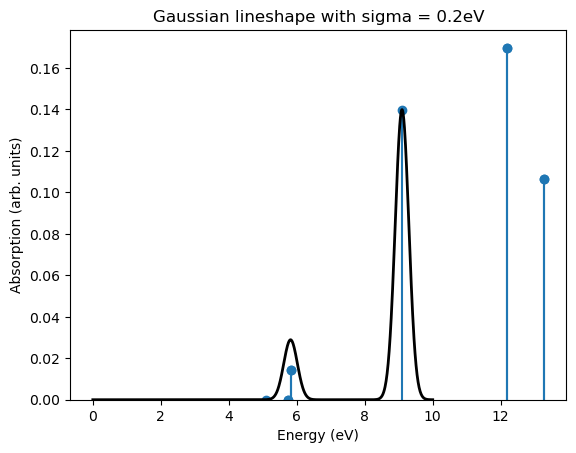

In [8]:
viz = Visualization(atoms, save_figure=True)
viz.plot_absorption_gaussian()